## A. Thu thập dữ liệu

### Ngữ cảnh và động lực 
- Trước khi nhóm bắt đầu lab, nhóm em đã nhìn nhận vấn đề năng lượng không chỉ là một thách thức quốc gia mà còn là một vấn đề toàn cầu đòi hỏi sự quan tâm và nỗ lực từ mọi người trên thế giới. Nhóm đã cảm nhận được sức mạnh của dữ liệu trong việc định hình chính sách, tạo ra những thay đổi và khám phá những xu hướng mới. Đó là lý do tại sao nhóm đã quyết định dành thời gian để phân tích dữ liệu về tiêu thụ năng lượng và điện năng trên toàn cầu.

### Nguồn dữ liệu

- Tập dữ liệu này được sử dụng cho việc phân tích trong lĩnh vực tiêu thụ năng lượng và điện năng, so sánh tỉ lệ tiêu thụ giữa các quốc gia và khám phá những thay đổi trong xu hướng tiêu thụ năng lượng ở các quốc gia trên thế giới theo thời gian.
- Tập dữ liệu được thu thập từ trang Kaggle: https://www.kaggle.com/datasets/labisininiolakamal/energy-production-2001-2021.
- Tác giả: LABISI NINIOLA KAMAL.
- License của dataset: Apache 2.0

## B. Khám phá dữ liệu

### Import thư viện

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler

### Đọc dữ liệu

In [2]:
current_directory = os.getcwd()
relative_path = "../datasets/Energy generataion data (2000-2021).csv"

file_path = os.path.join(current_directory, relative_path)
raw_df = pd.read_csv(file_path, encoding='latin1')
raw_df.head(5)

,Country,Code,Year,Population,Other renewables excluding bioenergy (Twh),Electricity from bioenergy (Twh),Electricity from solar (Twh),Electricity from wind (Twh),Electricity from hydro (Twh),Electricity from nuclear(Twh),...,Annual Co2 emissions,Annual Co2 relativity(%),Annual Co2 emissions per person,Annual Co2 emissions from coal,Annual Co2 emissions from gas,Annual Co2 emissions from oil,Access to electricity (% of population),access to electricity (percentile),Access to electricity (population),Primary energy consumption per capita (kWh/person)
0,Afghanistan,AFG,2001,"19,688,634",0.0,0.0,0.0,0.0,0.50,0.0,...,"1,069,098",0,0.05,"69,616","208,848","762,112",4.07,0.04,"802,228",237
1,Afghanistan,AFG,2004,"23,553,554",0.0,0.0,0.0,0.0,0.56,0.0,...,"1,237,247",16,0.05,"91,600","227,168","908,672",20.06,0.20,"4,726,013",204
2,Afghanistan,AFG,2002,"21,000,258",0.0,0.0,0.0,0.0,0.56,0.0,...,"1,340,995",8,0.06,"55,109","547,416","727,438",9.41,0.09,"1,975,947",211
3,Afghanistan,AFG,2003,"22,645,136",0.0,0.0,0.0,0.0,0.63,0.0,...,"1,559,602",16,0.07,"91,813","466,408","991,575",14.74,0.15,"3,337,555",230
4,Afghanistan,AFG,2005,"24,411,196",0.0,0.0,0.0,0.0,0.59,0.0,...,"1,889,507",21,0.08,"106,256","329,760","1,447,280",25.39,0.25,"6,198,221",252


### Tập dữ liệu có bao nhiêu dòng, cột?

In [3]:
shape = raw_df.shape
print(f'Có {shape[0]} dòng và {shape[1]} cột')

Có 4307 dòng và 23 cột


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Mỗi dòng trong dataset này cung cấp thông tin chi tiết về sự tiêu thụ các loại năng lượng và tác động môi trường của năng lượng(dựa vào độ đo CO2) trong một quốc gia vào một năm cụ thể.
- Nếu các dòng có ý nghĩa khác nhau sẽ làm cho tính tin cậy của tập dữ liệu bị giảm đi và có thể dẫn đến một vài sự nhầm lẫn và tính nhất quán giữa chúng.

### Mỗi cột có ý nghĩa gì?


In [4]:
new_column_names = {
    "Country": "country",
    "Code": "code",
    "Year": "year",
    "Population": "population",
    "Other renewables excluding bioenergy  (Twh)": "renewables_excl_bioenergy",
    "Electricity from bioenergy (Twh)": "bioenergy_electricity",
    "Electricity from solar (Twh)": "solar_electricity",
    "Electricity from wind  (Twh)": "wind_electricity",
    "Electricity from hydro (Twh)": "hydro_electricity",
    "Electricity from nuclear(Twh)": "nuclear_electricity",
    "Electricity from oil  (Twh)": "oil_electricity",
    "Electricity from gas  (Twh)": "gas_electricity",
    "Electricity from coal  (Twh)": "coal_electricity",
    "Annual Co2 emissions": "co2_emissions",
    "Annual Co2 relativity(%)": "co2_relativity_percent",
    "Annual Co2 emissions per person": "co2_emissions_per_person",
    "Annual Co2 emissions from coal": "co2_emissions_from_coal",
    "Annual Co2 emissions from gas": "co2_emissions_from_gas",
    "Annual Co2 emissions from oil": "co2_emissions_from_oil",
    "Access to electricity (% of population)": "access_to_electricity_percent",
    "access to electricity (percentile)": "access_to_electricity_percentile",
    "Access to electricity (population)": "access_to_electricity_population",
    "Primary energy consumption per capita (kWh/person)": "primary_energy_consumption_per_capita"
}

raw_df = raw_df.rename(columns=new_column_names)

| Tên cột                                       | Ý nghĩa                                    |
|-----------------------------------------------|--------------------------------------------------------------------|
| country                                       | Tên quốc gia                                                       |
| code                                          | Mã định danh cho quốc gia                                          |
| year                                          | Năm                                                                |
| population                                    | Dân số của quốc gia trong năm đó                                  |
| renewables_excl_bioenergy                    | Số lượng điện từ các nguồn tái tạo khác ngoại trừ bioenergy (Twh) |
| bioenergy_electricity                        | Số lượng điện từ bioenergy (Twh)                                  |
| solar_electricity                            | Số lượng điện từ năng lượng mặt trời (Twh)                       |
| wind_electricity                             | Số lượng điện từ năng lượng gió (Twh)                            |
| hydro_electricity                            | Số lượng điện từ năng lượng thủy điện (Twh)                      |
| nuclear_electricity                          | Số lượng điện từ năng lượng hạt nhân (Twh)                       |
| oil_electricity                              | Số lượng điện từ năng lượng dầu (Twh)                            |
| gas_electricity                              | Số lượng điện từ năng lượng khí (Twh)                            |
| coal_electricity                             | Số lượng điện từ năng lượng than (Twh)                           |
| co2_emissions                                | Lượng khí CO2 thải ra hàng năm                                    |
| co2_relativity_percent                       | Tỉ lệ CO2 so với tổng lượng CO2 thải ra trên thế giới (%)       |
| co2_emissions_per_person                     | Lượng khí CO2 thải ra trung bình trên mỗi người dân hằng năm        |
| co2_emissions_from_coal                      | Lượng khí CO2 thải ra từ năng lượng than hàng năm               |
| co2_emissions_from_gas                       | Lượng khí CO2 thải ra từ năng lượng khí hàng năm                |
| co2_emissions_from_oil                       | Lượng khí CO2 thải ra từ năng lượng dầu hàng năm                |
| access_to_electricity_percent                | Tỷ lệ dân số có quyền truy cập vào điện năng (%)               |
| access_to_electricity_percentile             | Phân vị của quốc gia về quyền truy cập vào điện năng           |
| access_to_electricity_population             | Số lượng dân số có quyền truy cập vào điện năng trong quốc gia |
| primary_energy_consumption_per_capita        | Tiêu thụ năng lượng chính trên mỗi người dân (kWh/người)       |


### Liệu có các dòng nào bị trùng lặp không?

In [5]:
duplicate_rows = raw_df[raw_df.duplicated()]
duplicate_rows.shape[0]

0

Tập dữ liệu này không có dòng nào bị trùng lặp!

### Mỗi cột hiện đang có kiểu dữ liệu gì?

In [6]:
raw_df.dtypes

country                                   object
code                                      object
year                                       int64
population                                object
renewables_excl_bioenergy                float64
bioenergy_electricity                    float64
solar_electricity                        float64
wind_electricity                         float64
hydro_electricity                        float64
nuclear_electricity                      float64
oil_electricity                          float64
gas_electricity                          float64
coal_electricity                         float64
co2_emissions                             object
co2_relativity_percent                    object
co2_emissions_per_person                 float64
co2_emissions_from_coal                   object
co2_emissions_from_gas                    object
co2_emissions_from_oil                    object
access_to_electricity_percent            float64
access_to_electricit

Dựa vào kết quả trên, các cột `population`, `co2_emissions`, `co2_relativity_percent`, `co2_emissions_from_coal`, `co2_emissions_from_gas`, `co2_emissions_from_oil`, `access_to_electricity_population`, `primary_energy_consumption_per_capita` có kiểu dữ liệu không hợp lí.
- Do đó cần phải chuyển các cột trên thành các cột có kiểu dữ liệu dạng số.
- Theo quan sát các cột này trong file dữ liệu, lí do các cột này không phải là các cột kiểu dữ liệu dạng số bởi vì có chứa dấu `','`, nên trước khi astype các cột này, phải xử lí các kí tự ngoại lệ trước!

In [7]:
def replace_comma(string):
    return string.replace(',', '')
commas_cols = ['population', 'co2_emissions', 'co2_relativity_percent', 'co2_emissions_from_coal', 'co2_emissions_from_gas', 'co2_emissions_from_oil', 'access_to_electricity_population', 'primary_energy_consumption_per_capita']
raw_df[commas_cols] = raw_df[commas_cols].apply(lambda x: x.str.replace(',', '') if x.dtype == 'O' else x)

raw_df[commas_cols] = raw_df[commas_cols].apply(pd.to_numeric)

In [8]:
raw_df.dtypes

country                                   object
code                                      object
year                                       int64
population                                 int64
renewables_excl_bioenergy                float64
bioenergy_electricity                    float64
solar_electricity                        float64
wind_electricity                         float64
hydro_electricity                        float64
nuclear_electricity                      float64
oil_electricity                          float64
gas_electricity                          float64
coal_electricity                         float64
co2_emissions                              int64
co2_relativity_percent                     int64
co2_emissions_per_person                 float64
co2_emissions_from_coal                    int64
co2_emissions_from_gas                     int64
co2_emissions_from_oil                     int64
access_to_electricity_percent            float64
access_to_electricit

### Với mỗi cột có kiểu là dữ liệu số, những giá trị trong cột đó được phân bố như thế nào?

In [9]:
num_col_df = raw_df.select_dtypes(include='number')
num_col_df.head(5)

,year,population,renewables_excl_bioenergy,bioenergy_electricity,solar_electricity,wind_electricity,hydro_electricity,nuclear_electricity,oil_electricity,gas_electricity,...,co2_emissions,co2_relativity_percent,co2_emissions_per_person,co2_emissions_from_coal,co2_emissions_from_gas,co2_emissions_from_oil,access_to_electricity_percent,access_to_electricity_percentile,access_to_electricity_population,primary_energy_consumption_per_capita
0,2001,19688634,0.0,0.0,0.0,0.0,0.50,0.0,0.09,0.0,...,1069098,0,0.05,69616,208848,762112,4.07,0.04,802228,237.0
1,2004,23553554,0.0,0.0,0.0,0.0,0.56,0.0,0.33,0.0,...,1237247,16,0.05,91600,227168,908672,20.06,0.20,4726013,204.0
2,2002,21000258,0.0,0.0,0.0,0.0,0.56,0.0,0.13,0.0,...,1340995,8,0.06,55109,547416,727438,9.41,0.09,1975947,211.0
3,2003,22645136,0.0,0.0,0.0,0.0,0.63,0.0,0.31,0.0,...,1559602,16,0.07,91813,466408,991575,14.74,0.15,3337555,230.0
4,2005,24411196,0.0,0.0,0.0,0.0,0.59,0.0,0.34,0.0,...,1889507,21,0.08,106256,329760,1447280,25.39,0.25,6198221,252.0


Với tất cả các cột là dữ liệu số trên, ta cần phải tính các giá trị sau cho từng cột:
- `missing_ratio`: tỉ lệ (0-100%) các giá trị bị thiếu.
- `min`: giá trị nhỏ nhất trong cột đó.
- `lower_quartile`: giá trị tứ phân vị thứ nhất của cột.
- `median`: giá trị trung vị của cột.
- `upper_quartile`: giá trị tứ phân vị thứ ba của cột.
- `max`: giá trị lớn nhất của cột.

In [10]:
def missing_ratio(s):
    missing_count = s.isnull().sum()
    total_values = len(s)
    ratio = (missing_count / total_values) * 100
    return ratio.round(1)

def lower_quartile(df):
    return df.quantile(0.25).round(1)

def upper_quartile(df):
    return df.quantile(0.75).round(1)

Dùng phương thức `.agg()` để áp dụng cho tất cả các cột của `numerical_cols`, mỗi dòng sẽ là giá trị cần tính đã được định nghĩa ở trên.

In [11]:
pd.set_option('display.float_format', lambda x : '%.2f' %x)
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, "median", upper_quartile, "max"])
num_col_info_df

,year,population,renewables_excl_bioenergy,bioenergy_electricity,solar_electricity,wind_electricity,hydro_electricity,nuclear_electricity,oil_electricity,gas_electricity,...,co2_emissions,co2_relativity_percent,co2_emissions_per_person,co2_emissions_from_coal,co2_emissions_from_gas,co2_emissions_from_oil,access_to_electricity_percent,access_to_electricity_percentile,access_to_electricity_population,primary_energy_consumption_per_capita
missing_ratio,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.30
min,2000.00,1833.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3664.00,-100.00,0.02,0.00,0.00,0.00,1.25,0.00,0.00,105.00
lower_quartile,2005.00,1377669.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.00,...,1737648.00,0.00,0.70,0.00,0.00,1144819.50,62.40,0.50,551009.50,3304.50
median,2011.00,6998022.00,0.00,0.00,0.00,0.00,0.86,0.00,0.53,0.00,...,8784956.00,2.00,2.61,158996.00,260144.00,5140592.00,98.36,0.98,4417562.00,13347.50
upper_quartile,2016.00,23840686.00,0.00,0.30,0.00,0.10,7.20,0.00,3.40,11.20,...,59382448.00,5.00,6.60,8539775.50,14531613.50,25045272.00,100.00,1.00,16427959.00,33200.00
max,2021.00,1425893500.00,19.16,165.93,327.00,655.80,1321.71,809.41,207.77,1624.17,...,11336233000.00,223913.00,67.49,7979436000.00,1675471500.00,2642691800.00,100.00,1.00,1407563900.00,657539.00


Kiểm tra xem cột nào có missing_ratio > 0 để tiến hành fill các giá trị bị mất

In [12]:
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, "median", upper_quartile, "max"])
temp = num_col_info_df.columns[num_col_info_df.loc['missing_ratio'] > 0.0].tolist()

missing_ratio_dict = num_col_info_df.loc['missing_ratio'][temp].to_dict()
missing_ratio_dict

{'access_to_electricity_percent': 4.0,
 'primary_energy_consumption_per_capita': 0.3}

In [13]:
mask = num_col_df['access_to_electricity_percent'].isna()
temp = raw_df[mask]['country'].unique().tolist()
print(f'access_to_electricity_percent: {temp}')

mask = num_col_df['primary_energy_consumption_per_capita'].isna()
temp = raw_df[mask]['country'].unique().tolist()
print(f'primary_energy_consumption_per_capita: {temp}')

access_to_electricity_percent: ['Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']
primary_energy_consumption_per_capita: ['Zimbabwe']


- Từ kết quả được in ra ở trên, ở cột `access_to_electricity_percent` có tận 8 nước bị mất dữ liệu ở cột này nên nhóm sẽ thay thế chúng bằng giá trị trung vị (median) của cột.
- Còn cột `access_to_electricity_percent`, thấy rằng chỉ có nước `Zimbabwe` bị thiếu dữ liệu nên có thể điền giá trị trung bình (mean) của nước này cho các giá trị thiếu đó.

In [14]:
median_atep = num_col_df['access_to_electricity_percent'].median()
num_col_df['access_to_electricity_percent'].fillna(median_atep, inplace=True)

pecpc_zimbabwe = (raw_df.loc[raw_df['country'] == 'Zimbabwe', 'primary_energy_consumption_per_capita']).mean()
num_col_df['primary_energy_consumption_per_capita'].fillna(pecpc_zimbabwe, inplace=True)

In [15]:
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, "median", upper_quartile, "max"])
temp = num_col_info_df.columns[num_col_info_df.loc['missing_ratio'] > 0.0].tolist()

missing_ratio_dict = num_col_info_df.loc['missing_ratio'][temp].to_dict()
missing_ratio_dict

{}

Như vậy, các giá trị bị thiếu đã được điền vào `num_col_df`.

### Với mỗi cột có kiểu là dạng phân loại, những giá trị trong cột đó được phân bố như thế nào?

In [16]:
cate_col_df = raw_df.select_dtypes(include=['object'])
cate_col_df.head()

,country,code
0,Afghanistan,AFG
1,Afghanistan,AFG
2,Afghanistan,AFG
3,Afghanistan,AFG
4,Afghanistan,AFG


Đối với các cột có kiểu là dạng phân loại, ta cũng sẽ tính:
- `missing_ratio`: tỉ lệ (0-100%) các giá trị bị thiếu.
- `num_values`: số lượng các giá trị độc nhất(unique) trong cột.
- `value_ratios`: tỉ lệ % tổng từng giá trị unique trên số lượng giá trị non-null của cột.

In [17]:
def missing_ratio(s):
    missing_count = s.isnull().sum()
    total_values = len(s)
    ratio = (missing_count / total_values) * 100
    return ratio.round(1)

def num_values(s):
    unique_count = s.nunique()
    return int(unique_count)

def value_ratios(s):
    distribution = s.value_counts().to_dict()
    for key in distribution:
        distribution[key] = (distribution[key]*100 / s.count()).round(1)
    return distribution

cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,country,code
missing_ratio,0.00,0.00
num_values,199,199
value_ratios,"{'Laos': 0.5, 'Qatar': 0.5, 'Nauru': 0.5, 'Nep...","{'LAO': 0.5, 'QAT': 0.5, 'NRU': 0.5, 'NPL': 0...."


In [18]:
missing_raio_cols = cat_col_info_df.columns[cat_col_info_df.iloc[0] > 0.0].tolist()
print(missing_raio_cols)

[]


**Nhận xét**:
- Từ bảng `cat_col_info_df`, ứng với mỗi nước đều có một mã riêng với tỉ lệ riêng là 0.5%.
- Vậy, ở những cột categorical này không có cột nào bị mất mát dữ liệu. 

In [19]:
#ghép 2 dataframe con sau khi tiền xử lí thành 1
raw_df = cate_col_df.join(num_col_df)
raw_df.head(5)

,country,code,year,population,renewables_excl_bioenergy,bioenergy_electricity,solar_electricity,wind_electricity,hydro_electricity,nuclear_electricity,...,co2_emissions,co2_relativity_percent,co2_emissions_per_person,co2_emissions_from_coal,co2_emissions_from_gas,co2_emissions_from_oil,access_to_electricity_percent,access_to_electricity_percentile,access_to_electricity_population,primary_energy_consumption_per_capita
0,Afghanistan,AFG,2001,19688634,0.00,0.00,0.00,0.00,0.50,0.00,...,1069098,0,0.05,69616,208848,762112,4.07,0.04,802228,237.00
1,Afghanistan,AFG,2004,23553554,0.00,0.00,0.00,0.00,0.56,0.00,...,1237247,16,0.05,91600,227168,908672,20.06,0.20,4726013,204.00
2,Afghanistan,AFG,2002,21000258,0.00,0.00,0.00,0.00,0.56,0.00,...,1340995,8,0.06,55109,547416,727438,9.41,0.09,1975947,211.00
3,Afghanistan,AFG,2003,22645136,0.00,0.00,0.00,0.00,0.63,0.00,...,1559602,16,0.07,91813,466408,991575,14.74,0.15,3337555,230.00
4,Afghanistan,AFG,2005,24411196,0.00,0.00,0.00,0.00,0.59,0.00,...,1889507,21,0.08,106256,329760,1447280,25.39,0.25,6198221,252.00


## C. Trực quan hóa dữ liệu

### Câu hỏi 1: Lượng khí CO2 thải ra theo từng năm như thế nào? Những tác nhân nào gây thải ra nhiều lượng khí CO2?

In [20]:
# Lấy giá trị trung bình lượng khí CO2 và các tác nhân thải khí CO2 theo từng năm
co2_by_year = raw_df.groupby('year').agg(
    avg_co2_emissions_from_coal=('co2_emissions_from_coal', 'mean'),
    avg_co2_emissions_from_gas=('co2_emissions_from_gas', 'mean'),
    avg_co2_emissions_from_oil=('co2_emissions_from_oil', 'mean'),
    avg_co2_emissions=('co2_emissions', 'mean')
).reset_index()

co2_by_year

,year,avg_co2_emissions_from_coal,avg_co2_emissions_from_gas,avg_co2_emissions_from_oil,avg_co2_emissions
0,2000,47708757.21,24129459.89,48139369.33,126569687.32
1,2001,47980459.84,23972736.32,48336281.27,126948840.16
2,2002,50177361.49,24635015.78,48187593.85,129756615.36
3,2003,54247907.84,25397976.08,49132247.78,136022669.42
4,2004,56071256.28,26173998.49,50535368.74,140270830.82
5,2005,59625990.31,26723564.70,50878907.49,145136326.67
6,2006,62485035.17,27275858.78,50540636.02,148621277.39
7,2007,65510964.61,28299305.82,50562973.86,153089130.12
8,2008,67281508.85,28846414.89,49865755.76,154665218.93
9,2009,66408768.62,28105119.87,48607515.66,151853187.95


In [21]:
# Lấy các cột số
value_cols = {'avg_co2_emissions_from_coal': 'Thải CO2 từ than', 'avg_co2_emissions_from_gas': 'Thải CO2 từ gas', 'avg_co2_emissions_from_oil': 'Thải CO2 từ dầu'}

# Tạo stacked bar chart layout
layout = go.Layout(title='Biểu đồ thống kê lượng khí CO2 thải ra theo từng năm', barmode='stack')

# Tạo danh sách lưu các trace
traces = []
for key, value in value_cols.items():
    trace = go.Bar(x=co2_by_year['year'], y=co2_by_year[key], name=value)
    traces.append(trace)

# Vẽ bar chart
fig = go.Figure(data=traces, layout=layout)

# Thêm line trace
fig.add_trace(go.Scatter(x=co2_by_year['year'], y=co2_by_year['avg_co2_emissions'], mode='lines+markers', name='Xu hướng thải CO2'))
fig.show()


Biểu đồ cho thấy số liệu thống kê về lượng khí thải CO2 từ năm 2000 đến 2021, được phân loại theo các nguồn sản xuất năng lượng khác nhau. Dữ liệu này cho thấy tổng lượng khí thải CO2 hàng năm, cũng như từng lượng khí thải CO2 từ dầu, khí đốt, và than đá.

Dữ liệu về lượng khí thải CO2 từ sản xuất năng lượng cho thấy một số điểm quan trọng:

- **Sự gia tăng liên tục:** Có một xu hướng tăng trưởng liên tục trong lượng khí thải CO2 qua các năm, điều này phản ánh sự phụ thuộc mạnh mẽ vào nhiên liệu hóa thạch như than đá, dầu mỏ và khí đốt.

- **Ảnh hưởng của các nguồn năng lượng:** Dữ liệu cũng cho thấy sự khác biệt về mức độ góp phần của từng loại nhiên liệu đến tổng lượng khí thải, trong đó than đá thường chiếm tỷ lệ cao nhất.

Thông qua biểu đồ này, chúng ta có thể nhận thấy một mô hình nhất quán trong mức độ phát thải và hiểu rõ hơn về ảnh hưởng của các loại năng lượng khác nhau đối với ô nhiễm môi trường. Điều này cung cấp cái nhìn sâu sắc về tác động của việc sử dụng năng lượng và là cơ sở quan trọng để đánh giá và phát triển các chiến lược giảm thiểu khí thải CO2 trong tương lai.

Tính phù hợp của biểu đồ đối với các trường dữ liệu được chọn:
- Để có thể nhanh chóng nhận biết xu hướng lượng CO2 thải ra theo từng năm như thế nào -> Line chart
- Để biết được những loại năng lượng nào phát thải nhiều hay ít; so sánh mức phát thải của các loại năng lượng so với tổng thể  -> Stacked bar chart

### Câu hỏi 2: Lượng khí thải CO2 ở các quốc gia trên thế giới chênh lệch như thế nào?

In [22]:
# Lấy trung bình lượng khí thải CO2 theo từng quốc gia
co2_by_country = raw_df.groupby('country')['co2_emissions'].agg(avg_co2_emissions='mean').reset_index()
co2_by_country

,country,avg_co2_emissions
0,Afghanistan,6959944.62
1,Albania,4541640.32
2,Algeria,130034914.18
3,Angola,20108535.00
4,Antigua and Barbuda,530589.32
...,...,...
194,Venezuela,144817838.18
195,Vietnam,165444032.91
196,Yemen,18634445.27
197,Zambia,4171764.32


In [23]:
# Tạo world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Kết hợp world map với dữ liệu co2_by_country
merged = world.merge(co2_by_country, left_on='name', right_on='country', how='left')

#  Cấu hình choropleth map
fig = px.choropleth(merged, 
                    locations='iso_a3',  # ISO Alpha-3 (mã quốc gia)
                    color='avg_co2_emissions',  # Chỉnh màu dựa vào cột avg_co2_emissions
                    hover_name='country',  # Thông tin khi di chuột vào quốc gia
                    projection='natural earth',
                    title='Lượng khí CO2 trung bình thải ra ở các quốc gia')

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})


# Show the plot
fig.show()


Biểu đồ bạn cung cấp mô tả lượng khí CO2 trung bình thải ra ở các quốc gia, với màu sắc khác nhau đại diện cho lượng thải khác nhau. Dựa vào biểu đồ này, ta có thể nhận xét:

- **Sự chênh lệch lớn**: Có sự chênh lệch đáng kể về lượng khí thải CO2 giữa các quốc gia, điều này có thể phản ánh mức độ công nghiệp hóa, quy mô dân số, và chính sách môi trường của từng quốc gia.
- **Mối quan hệ với phát triển**: Các quốc gia có lượng khí thải cao thường là những nước có nền kinh tế phát triển mạnh, cho thấy mối liên hệ giữa phát triển kinh tế và lượng khí thải CO2.
- **Cần thiết phải hành động**: Biểu đồ nhấn mạnh tầm quan trọng của việc giảm thiểu khí thải CO2, đặc biệt là từ các quốc gia có lượng thải lớn, để đối phó với biến đổi khí hậu toàn cầu.

Nhìn chung, biểu đồ cung cấp cái nhìn tổng quan về tình hình khí thải CO2 toàn cầu và gợi ý về nhu cầu cải thiện chính sách môi trường và phát triển bền vững.

Tính phù hợp của biểu đồ đối với các trường dữ liệu được chọn:
- Để so sánh được lượng mức khí thải CO2 trung bình của từng quốc gia -> Geo map chart

### Câu hỏi 3: Lượng năng lượng được tạo ra từ các nguồn khác nhau và các nước có tổng lượng đứng đầu từ năm 2000 đến năm 2021?

In [24]:
energy_sources = ['renewables_excl_bioenergy', 'bioenergy_electricity',
       'solar_electricity', 'wind_electricity', 'hydro_electricity',
       'nuclear_electricity', 'oil_electricity', 'gas_electricity',
       'coal_electricity']

# Choose some highest generated energy source
total_volume = raw_df[energy_sources].sum().sort_values(ascending=False).reset_index()
total_volume = total_volume.rename(columns = {'index': 'Source', 0: 'Total_volume'})
total_volume

,Source,Total_volume
0,coal_electricity,181407.58
1,gas_electricity,96273.21
2,hydro_electricity,74765.89
3,nuclear_electricity,56821.05
4,oil_electricity,21218.93
5,wind_electricity,12890.47
6,bioenergy_electricity,7682.29
7,solar_electricity,4737.35
8,renewables_excl_bioenergy,1507.10


In [25]:
fig = px.bar(total_volume, x='Source', y='Total_volume', title='Total Volume of Electricity Generated from Each Source',
             color_discrete_sequence=px.colors.qualitative.Prism)

fig.update_layout(yaxis = dict(showgrid = False))
fig.show()

#### Nhận xét:
- Biểu đồ cột về tổng lượng điện sản xuất, được tạo ra từ các nguồn khác nhau gồm từ than đá, khí ga, khí hydro, năng lượng hạt nhân, dầu mỏ, gió, năng lượng xanh, mặt trời, và các nguồn năng lượng tái tạo được trừ năng lượng xanh
- Tổng lượng điện tạo ra từ than đá là lớn nhất 181.4076k TWh, gần gấp đôi tổng lượng điện được tạo ra từ khí đốt 96.27321k TWh
- Xếp thứ 3 là lượng điện tạo ra từ khí hydro, tiếp đến là từ năng lượng hạt nhân
- Lượng điện tạo ra từ các nguồn còn lại tương đối ít so với tổng lượng điện tạo ra từ than đá

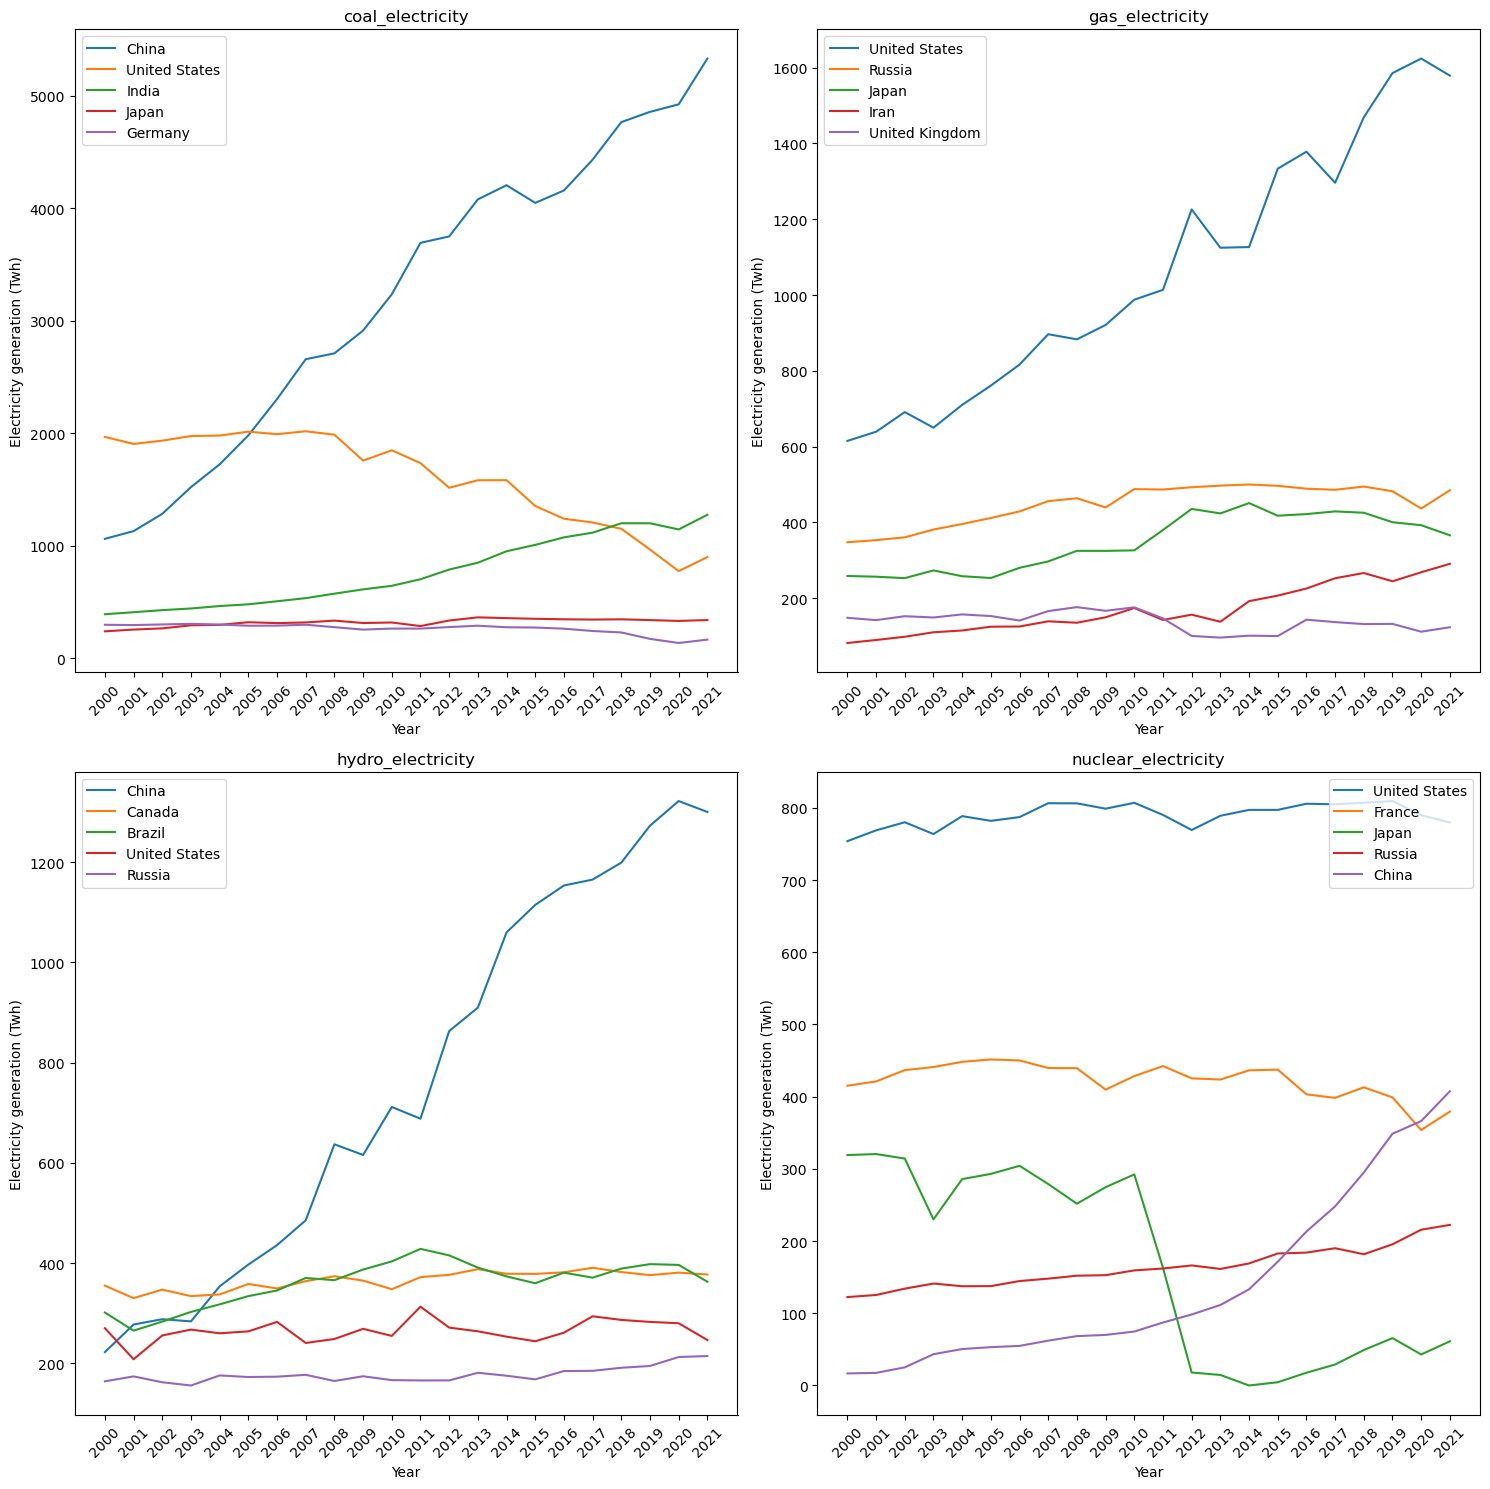

In [26]:
grouped = raw_df.groupby(['country', 'year']).sum()

selected_sources = ['coal_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity']

# Plot the data for each selected source

fig, axs = plt.subplots(2, 2, figsize=(15, 15))  # Adjust the figure size if necessary
axs = axs.flatten()  # Flatten the axes array

totals = raw_df.groupby('country')[selected_sources].sum()
for i, source in enumerate(selected_sources):
    top_countries = totals[source].nlargest(5).index
 
    for country in top_countries:
        data = raw_df[raw_df['country'] == country]
        data = data.sort_values('year')  
        axs[i].plot(data['year'], data[source], label=country)

    axs[i].set_title(f'{source}')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Electricity generation (Twh)')
    axs[i].set_xticks(range(min(data['year']), max(data['year'])+1, 1))
    axs[i].legend()
    axs[i].tick_params(axis='x', rotation = 45) 


plt.tight_layout()
plt.show()

### Câu 4: Có sự khác biệt nào giữa các quốc gia có dân số đông và các quốc gia có dân số ít về tỷ trọng tiêu thụ điện năng từ năm 2020?

Tạo DataFrame gồm Top 5 quốc gia có dân số đông nhất và Top 5 quốc gia có dân số ít nhất.

In [27]:
top5_largest = raw_df[raw_df['country'].isin(raw_df.groupby('country')['population'].max().nlargest(5).index)]
top5_smallest = raw_df[raw_df['country'].isin(raw_df.groupby('country')['population'].max().nsmallest(5).index)]
top5_largest

,country,code,year,population,renewables_excl_bioenergy,bioenergy_electricity,solar_electricity,wind_electricity,hydro_electricity,nuclear_electricity,...,co2_emissions,co2_relativity_percent,co2_emissions_per_person,co2_emissions_from_coal,co2_emissions_from_gas,co2_emissions_from_oil,access_to_electricity_percent,access_to_electricity_percentile,access_to_electricity_population,primary_energy_consumption_per_capita
777,China,CHN,2000,1264099100,0.00,2.54,0.02,0.59,222.41,16.74,...,3649201000,0,2.89,2601736700,59796480,648685600,100.00,1.00,1264099100,9335.00
778,China,CHN,2001,1272739600,0.00,2.55,0.03,0.72,277.43,17.47,...,3728513500,2,2.93,2637655000,67157460,659300160,100.00,1.00,1272739600,9798.00
779,China,CHN,2002,1280926100,0.00,2.55,0.05,0.84,287.97,25.13,...,4103042600,10,3.20,3018634000,53992704,653086000,100.00,1.00,1280926100,10602.00
780,China,CHN,2003,1288873300,0.00,2.54,0.06,1.00,283.68,43.34,...,4841118700,18,3.76,3601711900,60745456,727098800,100.00,1.00,1288873300,12273.00
781,China,CHN,2004,1296816800,0.00,2.53,0.08,1.28,353.54,50.47,...,5217351000,8,4.02,3835288300,71521280,839092700,100.00,1.00,1296816800,14273.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4126,United States,USA,2003,291109820,16.85,53.34,0.53,11.19,267.27,763.73,...,6010145300,0,20.65,2143993000,1201023100,2557467400,43.00,0.43,125177223,80583.00
4127,United States,USA,2006,299753100,16.51,54.86,0.51,26.59,282.69,787.22,...,6052686000,1,20.19,2152458800,1173211400,2609707800,34.17,0.34,102434159,76989.00
4128,United States,USA,2004,293947870,16.95,53.54,0.58,14.14,259.93,788.53,...,6112655000,1,20.80,2164772900,1204496000,2630825500,44.52,0.45,130878746,79489.00
4129,United States,USA,2007,302743400,16.70,55.54,0.61,34.45,240.61,806.42,...,6130123000,0,20.25,2175189000,1247391000,2592216300,34.20,0.34,103538243,359735.00


Để vẽ radar chart:

- Chuẩn hóa dữ liệu: chuẩn hóa thành phạm vi từ 0 đến 1 bằng cách sử dụng **MinMaxScaler** từ thư viện **sklearn**. Điều này đảm bảo tất cả các biến đều có cùng tỷ lệ cho biểu đồ radar.
- Tính toán góc: Các góc cho trục biểu đồ radar được tính bằng radian với số trục bằng số nguồn điện.

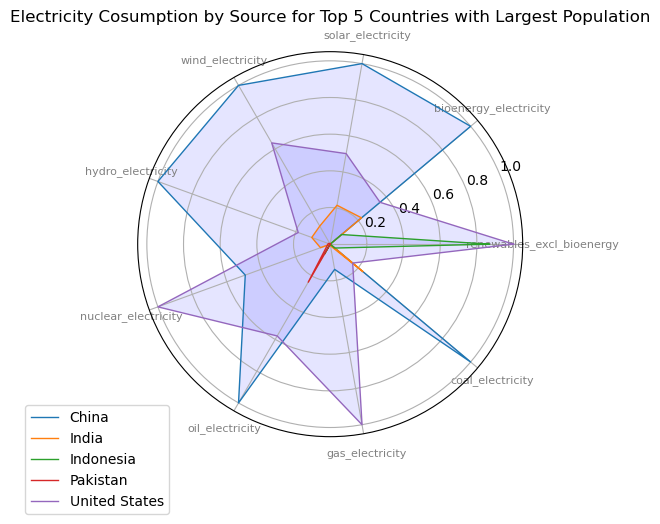

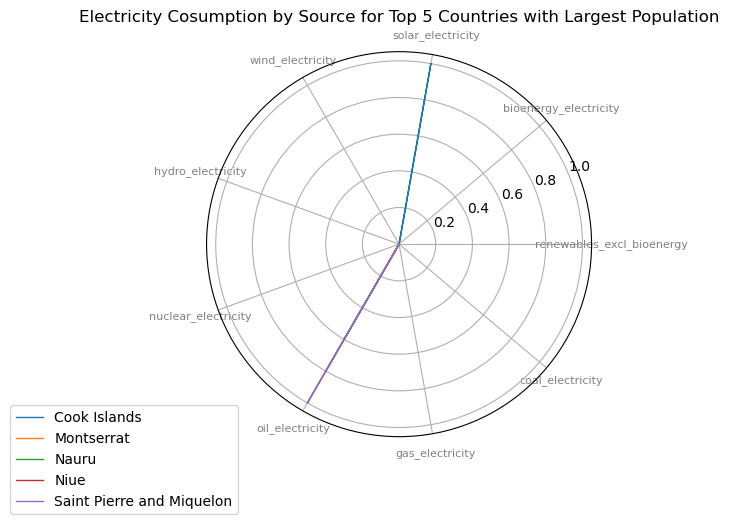

In [28]:
# Chọn các cột điện năng
columns = ['renewables_excl_bioenergy', 'bioenergy_electricity',
       'solar_electricity', 'wind_electricity', 'hydro_electricity',
       'nuclear_electricity', 'oil_electricity', 'gas_electricity',
       'coal_electricity']

# Lấy trung bình các giá trị điện năng từ năm 2020 để dễ plot
data1 = top5_largest[top5_largest['year']>=2020].groupby('country')[columns].mean()
data2 = top5_smallest[top5_smallest['year']>=2020].groupby('country')[columns].mean()

def radar_chart(data):
    # Chuẩn hóa
    scaler = MinMaxScaler()
    data_normalized = scaler.fit_transform(data)

    # Tính toán góc
    N = len(data.columns)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

    for i in range(data_normalized.shape[0]):
        values = data_normalized[i].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=data.index[i])
        ax.fill(angles, values, 'b', alpha=0.1)

    plt.xticks(angles[:-1], data.columns, color='grey', size=8)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Electricity Cosumption by Source for Top 5 Countries with Largest Population')
    plt.show()


radar_chart(data1)
radar_chart(data2)

**NHẬN XÉT:** 

1. **Sản xuất điện theo nguồn cho 5 quốc gia có dân số lớn nhất**: 
    - Biểu đồ cho thấy sự cân đối giữa các nguồn năng lượng, cho thấy những quốc gia này đã đa dạng hóa việc sản xuất điện của mình qua nhiều nguồn vì vậy người dân có thể sử dụng được nhiều nguồn khác nhau. Đây là xu hướng tích cực vì nó làm giảm sự phụ thuộc vào một nguồn duy nhất và thúc đẩy việc sử dụng năng lượng tái tạo.
    - Các quốc gia không chú trọng phát triển một loại năng lượng nào giống nhau, mỗi quôc gia có thế mạnh riêng.
    - Tuy nhiên India, Indonesia, Pakistan tiêu thụ ít loại điện năng so với China, US nên trên biểu đồ các mạng lưới thể hiện của các quốc gia này nhỏ.

2. **Sản xuất điện theo nguồn cho 5 quốc gia có dân số nhỏ nhất**: 
    - Một đường (có thể đại diện cho một nguồn năng lượng) chiếm ưu thế trong biểu đồ này, cho thấy những quốc gia này phụ thuộc nặng nề vào một loại sản xuất năng lượng có thể do vị trí địa lý và nguồn tài nguyên sẵn có khan hiếm.


Nhìn chung, các quốc gia, bất kể kích thước dân số, đang đa dạng hóa nguồn năng lượng của mình, giảm sự phụ thuộc vào một nguồn duy nhất và thúc đẩy việc sử dụng năng lượng tái tạo.
Các quốc gia có dân số lớn hơn có xu hướng có sự cân đối hơn trong việc sử dụng các nguồn năng lượng khác nhau so với các quốc gia có dân số nhỏ hơn, có thể do hạn chế về nguồn lực và cơ sở hạ tầng.
Biểu đồ cho thấy rằng năng lượng tái tạo đang chiếm một phần lớn trong cấu trúc năng lượng của nhiều quốc gia, cho thấy xu hướng toàn cầu hướng tới việc sử dụng năng lượng bền vững.


Tính phù hợp của biểu đồ đối với các trường dữ liệu được chọn:
- Để có thể nhận biết và so sánh tỷ trọng các nguồn điện năng của các quốc gia -> Radar chart

### Câu 5: Xu hướng của sự tiêu thụ các nguồn năng lượng tái tạo và năng lượng truyền thống thay đổi như thế nào qua từng năm? Mối tương quan giữa các loại năng lượng với tổng lượng CO2 được thải ra hằng năm?

Đầu tiên, ta cần các cột từ raw_data gồm các cột kết thúc `_electricity`, cột `year` và cột `co2_emissions`

In [29]:
cols = [col for col in list(raw_df.columns) if col.endswith("_electricity")]
cols.append('year')
cols.append('co2_emissions')
electric_consuming_df = raw_df[cols]
electric_consuming_df.head()

,bioenergy_electricity,solar_electricity,wind_electricity,hydro_electricity,nuclear_electricity,oil_electricity,gas_electricity,coal_electricity,year,co2_emissions
0,0.00,0.00,0.00,0.50,0.00,0.09,0.00,0.00,2001,1069098
1,0.00,0.00,0.00,0.56,0.00,0.33,0.00,0.00,2004,1237247
2,0.00,0.00,0.00,0.56,0.00,0.13,0.00,0.00,2002,1340995
3,0.00,0.00,0.00,0.63,0.00,0.31,0.00,0.00,2003,1559602
4,0.00,0.00,0.00,0.59,0.00,0.34,0.00,0.00,2005,1889507


Để biết được xu hướng giữa năng lượng tái tạo và năng lượng truyền thống, nhóm sẽ chia các loại năng lượng:
- `Năng lượng tái tạo`: `năng lượng sinh học(bioenergy)`, `năng lượng mặt trời(solar)`, `điện gió(wind)`, `thủy điện(hydro)`, `năng lượng hạt nhân(nuclear)`.
- `Năng lượng truyền thống`: `dầu(oil)`, `khí đốt(gas)` và `than đá(coal)`.

In [30]:
temp = (cols[0:5])
temp.append('year')
renewable_df = electric_consuming_df[temp]
renewable_df.head()

,bioenergy_electricity,solar_electricity,wind_electricity,hydro_electricity,nuclear_electricity,year
0,0.00,0.00,0.00,0.50,0.00,2001
1,0.00,0.00,0.00,0.56,0.00,2004
2,0.00,0.00,0.00,0.56,0.00,2002
3,0.00,0.00,0.00,0.63,0.00,2003
4,0.00,0.00,0.00,0.59,0.00,2005


In [31]:
result = renewable_df.groupby('year').sum()
year = list(result.index)
sum_of_renewable = result.sum(axis=1).to_list()

In [32]:
temp = (cols[5:8])
temp.append('year')
nonrenewable_df = electric_consuming_df[temp]
nonrenewable_df.head()

,oil_electricity,gas_electricity,coal_electricity,year
0,0.09,0.00,0.00,2001
1,0.33,0.00,0.00,2004
2,0.13,0.00,0.00,2002
3,0.31,0.00,0.00,2003
4,0.34,0.00,0.00,2005


In [33]:
result = nonrenewable_df.groupby('year').sum()
sum_of_nonrenewable = result.sum(axis=1).to_list()

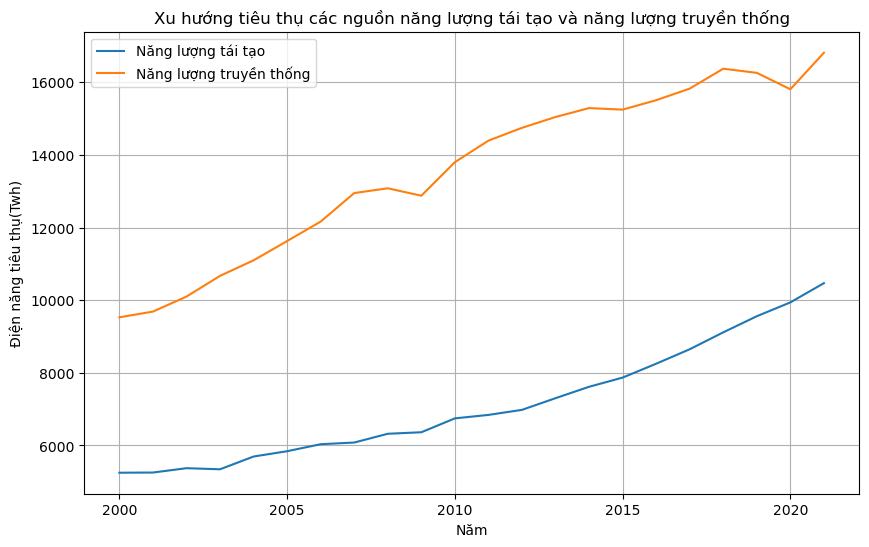

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(year, sum_of_renewable, label='Năng lượng tái tạo')
plt.plot(year, sum_of_nonrenewable, label='Năng lượng truyền thống')

plt.title('Xu hướng tiêu thụ các nguồn năng lượng tái tạo và năng lượng truyền thống')

plt.xlabel('Năm')
plt.ylabel('Điện năng tiêu thụ(Twh)')
plt.legend()

plt.grid(True)
plt.show()

Task tiếp theo do nhóm có dùng đường hồi quy cho biểu đồ scatter plot để thể hiện mối tương quan giữa 2 biến nên đầu tiên sẽ loại bỏ các outliers để tăng độ chính xác.

In [35]:
def remove_outliers_iqr(df, columns):
    clean_df = pd.DataFrame()
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        clean_df = pd.concat([clean_df, df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]])
    
    # Loại bỏ các dòng trùng lặp nếu có
    clean_df.drop_duplicates(inplace=True)
    
    return clean_df

In [36]:
relations = electric_consuming_df.drop(columns='year')
cols = list(relations.columns)
outliers_removed_df = remove_outliers_iqr(relations, cols)
outliers_removed_df.head()

,bioenergy_electricity,solar_electricity,wind_electricity,hydro_electricity,nuclear_electricity,oil_electricity,gas_electricity,coal_electricity,co2_emissions
0,0.00,0.00,0.00,0.50,0.00,0.09,0.00,0.00,1069098
1,0.00,0.00,0.00,0.56,0.00,0.33,0.00,0.00,1237247
2,0.00,0.00,0.00,0.56,0.00,0.13,0.00,0.00,1340995
3,0.00,0.00,0.00,0.63,0.00,0.31,0.00,0.00,1559602
4,0.00,0.00,0.00,0.59,0.00,0.34,0.00,0.00,1889507


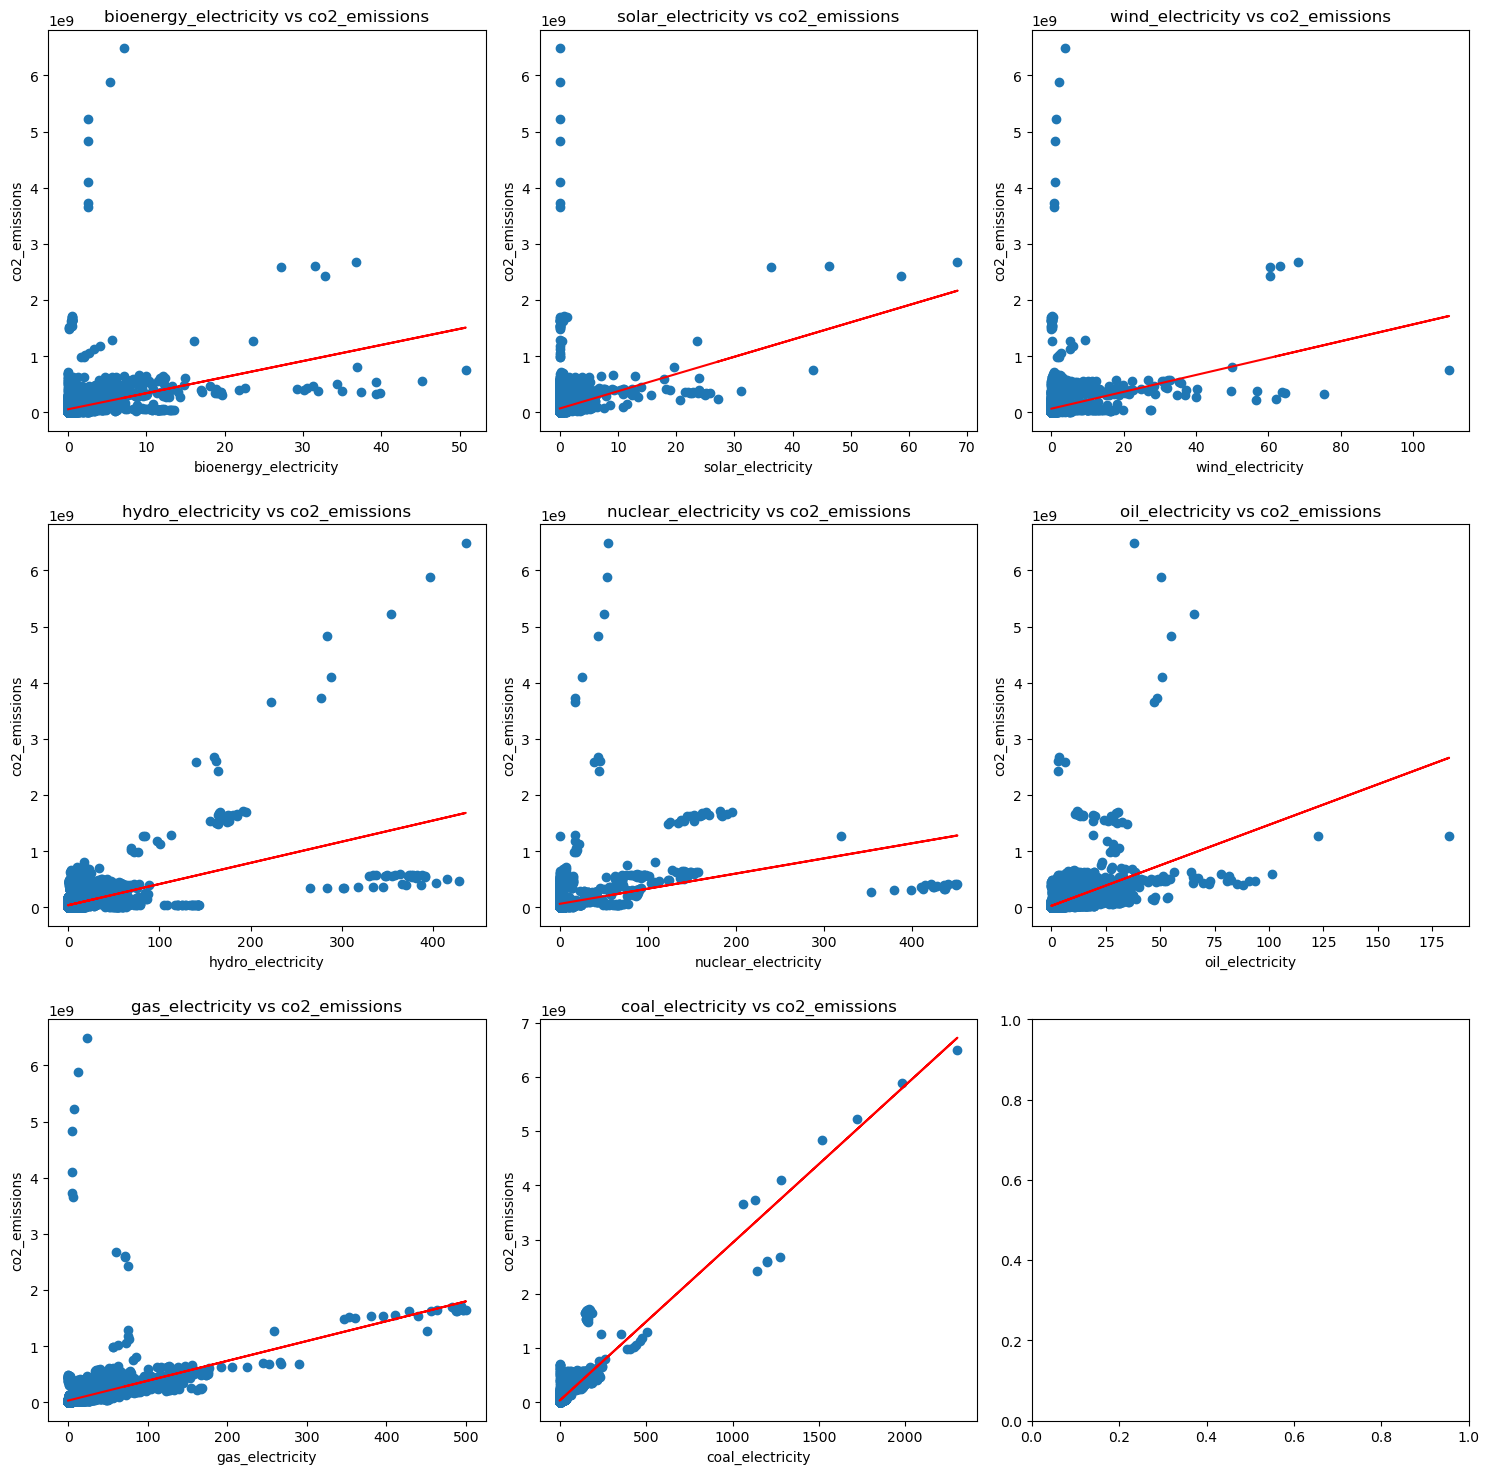

In [37]:
from sklearn.linear_model import LinearRegression
def plot_all_columns(df):
    # Xây dựng mô hình hồi quy tuyến tính cho từng cột
    model = LinearRegression()

    #3x3=9
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))

    # Vẽ từng subplot
    for i in range(3):
        for j in range(3):
            column_index = i * 3 + j
            if column_index < len(df.columns) - 1: 
                column_name = df.columns[column_index]
                model.fit(df[[column_name]], df[df.columns[-1]])
                predictions = model.predict(df[[column_name]])
                
                axs[i, j].scatter(df[column_name], df[df.columns[-1]])
                axs[i, j].plot(df[column_name], predictions, color='red')
                axs[i, j].set_xlabel(column_name)
                axs[i, j].set_ylabel(df.columns[-1])
                axs[i, j].set_title(f'{column_name} vs {df.columns[-1]}')

    plt.tight_layout()
    plt.show()
plot_all_columns(outliers_removed_df)

**NHẬN XÉT:** 

1. **Biểu đồ thể hiện mức tiêu thụ các nguồn năng lượng tái tạo và năng lượng truyền thống qua từng năm**:
   - Qua biểu đồ ta thấy rằng, lượng điện năng tiêu thụ từ năng lượng truyền thống `cao áp đảo` so với từ năng lượng tái tạo. Hầu hết các nước trên thế giới còn phụ thuộc nhiều vào nguồn năng lượng truyền thống có lẽ bởi vì khả năng cung cấp năng lượng ổn định và đáng tin cậy cho các hệ thống điện, công nghiệp và hộ gia đình. Trong khi năng lượng tái tạo, điển hình như năng lượng hạt nhân, có thể giải phóng năng lượng hàng triệu lần so với các nguồn năng lượng khác, tuy nhiên nhược điểm lớn nhất của nó chính là độ tin cậy - rủi ro phóng xạ,...
   - Sự chênh lệch giữa 2 loại năng lượng vẫn tăng theo thời gian, cho thấy năng lượng truyền thống vẫn là `nguồn cung năng lượng chính` trên toàn thế giới.
   - Mức tiêu thụ của 2 loại năng lượng tăng theo hằng năm, đặc biệt là sự tăng trưởng nguồn năng lượng tái tạo, mặc dù nó không tăng nhanh nhưng lại tăng ổn định qua từng năm. Qua đó có thể thấy xu hướng của toàn thế giới trong việc chuyển dịch sang các nguồn năng lượng tái tạo, sạch hơn.
   - Tại đường màu vàng(truyền thống) có thể thấy tại các năm 2008-2009 và 2019-2020 có sự biến động bất thường:
     - `Năm 2008-2009`: chịu ảnh hưởng của cuộc khủng hoảng tài chính toàn thế giới năm 2008. Cuộc khủng hoảng này xuất phát từ nước Mỹ sau đó lan sang các nước, rồi đến các khu vực. Cuộc khủng hoảng này đã làm biến động giá dầu, lương thực,...đẩy nền kinh tế vào cuộc khủng hoảng tài chính trầm trọng nhất kể từ cuộc Đại suy thoái 1929 – 1933.
     - `Năm 2019-2020`: bùng phát đại dịch Covid-19 làm tê liệt nền kinh tế, y tế, xã hội toàn thế giới, đặc biệt ngành công nghiệp - nhân tố chính trong việc tiêu thụ điện năng trong cơ cấu nền kinh tế. Việc cách ly nghiêm ngặt dẫn đến người dân chấp nhận sống trong "4 bức tường" tạo nên nhiều "thành phố ma", nhiều doanh nghiệp phải đóng cửa các xí nghiệp, công ty. Đó là 1 trong số các lý do dẫn đến việc tiêu thụ điện năng bị giảm trong các khoảng thời gian này.
2. **Các biểu đồ scatter plot thể hiện mối tương quan giữa từng loại năng lượng với lượng CO2 thải ra hằng năm**:
    - Mặc dù việc phân loại nhóm năng lượng đã nói lên mối quan hệ giữa các loại năng lượng và lượng CO2 được tạo ra. Nhóm muốn đào sâu vào chúng để xem liệu năng lượng tái tạo(sạch) có thật sự sạch hay không?
    - Trong tất cả 8 biểu đồ scatter plot trên, cả 8 đều có `độ tương quan dương(positive correlation)`. Điều này cho thấy, các nguồn năng lượng sạch cũng có thể tạo ra lượng CO2.
    - Loại năng lượng có độ tương quan dương yếu nhất là `năng lượng hạt nhân`. -> Tạo ra khí CO2 ít nhất.
    - Loại năng lượng có độ tương quan dương mạnh nhất là `năng lượng than đá`. -> Tạo ra khí CO2 nhiều nhất(do là nguồn cung điện chính trong ngành công nghiệp, gia đình, thương mại,...).
    - Việc các nguồn năng lượng tái tạo gây ra lượng CO2 có thể do:
      - `Cơ sở hạ tầng hiện có`: việc triển khai các cơ sở hạ tầng cho việc sản xuất điện năng có thể phát sinh ra CO2.
      - `Tích hợp lưới điện`: khi việc cung ứng điện do các nguồn năng lượng tái tạo không ổn định, mạng lưới điện có thể dùng đến các nguồn năng lượng dự phòng như dầu khí, than đá,... cũng gây ra sự phát sinh CO2.
      - `Qúa trình sản xuất`: trong giai đoạn sản xuất như sản xuất tấm pin mặt trời, tuabin gió, xây đập thủy điện, ủ khí biogas,...có thể tạo ra lượng CO2 nhất định.